In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from MetroSim.py import func


In [230]:
data = pd.read_csv('/Users/danielmessier/Desktop/Current_Projects/Khatami/Code/20.csv', index_col=0) # Download a premade data set

In [231]:
def W1(x, e):
    m = x.sum()/len(x)
    W = [m-e, 0-m-e, m+e]
    W = [(1.0/(1.0+e))*i for i in W]
    return m, W

def W2(y, a):
    W = np.array(([a, -1.0, a],[-a, 1.0, -a]))
    out = W.dot(y)
    return out

In [233]:
i = 0
d = np.zeros((1400, 7))
def frame(arr,s, eps):
    d = np.zeros((1400, 7))
    mag, k = W1(data.iloc[s].values, eps)
    arr[s,0] = mag
    arr[s,1:4] = k[:]
    if i < 700 and mag>0:
        arr[s,4:] = [1,0,0]
    elif i < 700 and mag<0:
        arr[s,4:] = [0,0,1]
    else:
        arr[s,4:] = [0,1,0]

while i < data.shape[0]:
    frame(d ,i, 0.4)
    i += 1

np.random.shuffle(d)
print(d[0,:])

[ 0.905       0.36071429 -0.93214286  0.93214286  1.          0.
  0.        ]


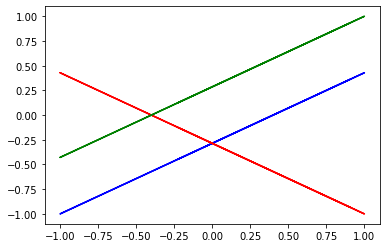

In [234]:
plt.plot(d[:,0], d[:,1], 'b')
plt.plot(d[:,0], d[:,2], 'r')
plt.plot(d[:,0], d[:,3], 'g')
plt.show()

In [239]:
def costf(k):
    i = 0
    q = 0
    while i < k.shape[0]:
        j = 0
        d = 0
        while j <3:
            comp = k[i,j+4]-k[i,j+1]
            d += np.power(comp,2.0)
            j +=1
        q += np.sqrt(d)
        i += 1
    q %= k.shape[0]
    return q

In [245]:
e = np.arange(0.005,0.1, 0.005)
cost = []

for h in e:
    data1 = np.zeros((1400, 7))
    i = 0
    while i < data.shape[0]:
        frame(data1, i, h)
        i += 1
    cost.append(costf(data1))


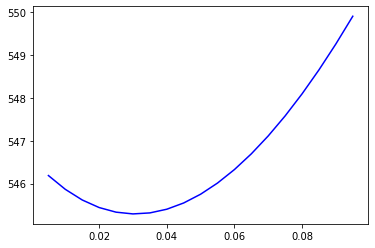

In [246]:
plt.plot(e, cost, 'b')
plt.show()

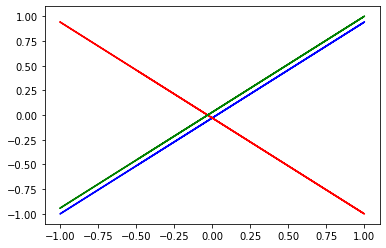

In [256]:
ro = np.zeros((1400, 7))
i=0
while i < data.shape[0]:
    frame(ro ,i, 0.03)
    i += 1

plt.plot(ro[:,0], ro[:,1], 'b')
plt.plot(ro[:,0], ro[:,2], 'r')
plt.plot(ro[:,0], ro[:,3], 'g')
plt.show()

In [267]:
l = func(20000, 15, 2.3)
print(l)

[ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


In [ ]:
a, b, c, d, e, f = np.
